In [2]:
!pip install pandas numpy matplotlib pmdarima



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima


In [5]:
# Replace 'path_to_file.csv' with the actual path to your CSV file.
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)


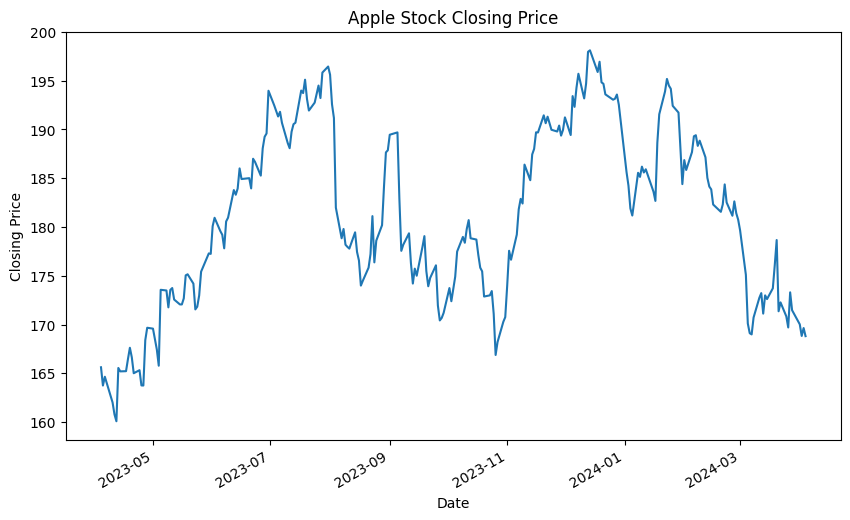

In [7]:
# Replace 'path_to_file.csv' with the actual path to your CSV file.
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)

# Visualize the 'Close' prices
data['Close'].plot(figsize=(10, 6))
plt.title('Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [9]:
train = data[:int(0.7*(len(data)))]
test = data[int(0.7*(len(data))):]

model = auto_arima(train['Close'], seasonal=False, m=1, trace=True)




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=777.214, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=770.773, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=771.659, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=771.620, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=770.044, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=773.366, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.496 seconds


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

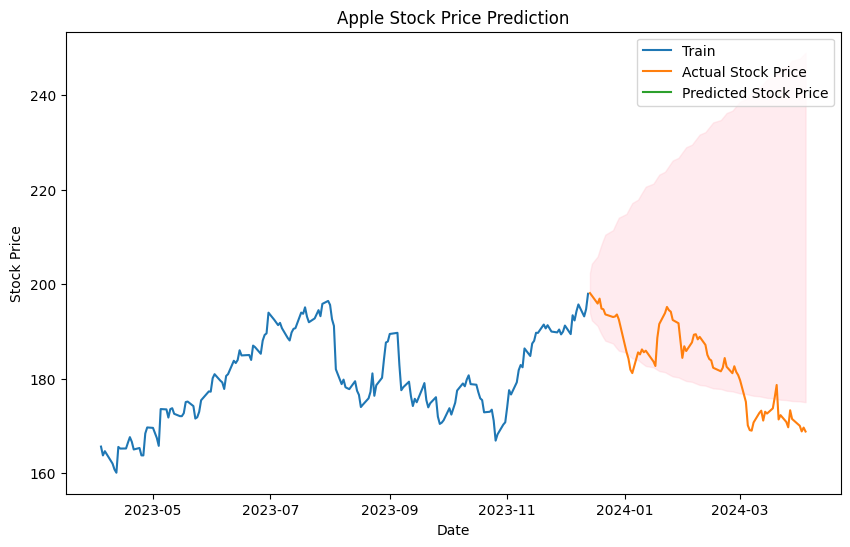

In [10]:
from pmdarima import ARIMA

# Assuming 'train' contains the training data
model = ARIMA(order=(0, 1, 0))
model_fit = model.fit(train['Close'])

# Now, let's make predictions
forecast, confint = model_fit.predict(n_periods=len(test), return_conf_int=True)
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Actual Stock Price')
plt.plot(forecast['Prediction'], label='Predicted Stock Price')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='pink', alpha=.3)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your dataset
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)

# Select the 'Close' column and scale the data
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create the scaled training and test sets using a window
def create_dataset(dataset, time_step=1):
    X_data, y_data = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # X values
        X_data.append(a)
        y_data.append(dataset[i + time_step, 0])  # y value
    return np.array(X_data), np.array(y_data)

time_step = 100
X, y = create_dataset(scaled_data, time_step)
# split into train and test sets (70% training, for example)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Predict and inverse the scaling
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics
train_RMSE = np.sqrt(np.mean(np.power((y_train - train_predict), 2)))
test_RMSE = np.sqrt(np.mean(np.power((y_test - test_predict), 2)))

# Visualize the results
# ... (plotting code)



Epoch 1/100


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.5201 - val_loss: 0.1054
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1771 - val_loss: 0.0322
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0400 - val_loss: 0.1491
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0617 - val_loss: 0.0364
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0258 - val_loss: 0.0126
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0352 - val_loss: 0.0120
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0337 - val_loss: 0.0155
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0261 - val_loss: 0.0311
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0242 - val_loss: 0.0430
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0249 - val_loss: 0.0320
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0222 - val_loss: 0.0205
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0229 - val_loss: 0.0163


In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your dataset
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Function to create a dataset with X (data) and y (target) sets
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Split the data into training and test sets
look_back = 60  # Choose a look-back period
X, y = create_dataset(scaled_data, look_back)
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)  # Start with 1 epoch for testing

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error
train_score = np.sqrt(np.mean(np.power(train_predict - y_train, 2), axis=1))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(np.mean(np.power(test_predict - y_test, 2), axis=1))
print('Test Score: %.2f RMSE' % (test_score))

# Plotting
import matplotlib.pyplot as plt

# Shift train predictions for plotting
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 - 2s - 14ms/step - loss: 0.0775
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


TypeError: only length-1 arrays can be converted to Python scalars

In [16]:
# Invert predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Reshape y_train and y_test for inverse transform
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_train = scaler.inverse_transform(y_train_reshaped)
y_test = scaler.inverse_transform(y_test_reshaped)

# Calculate root mean squared error
train_score = np.sqrt(np.mean(np.power(train_predict - y_train, 2), axis=0))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(np.mean(np.power(test_predict - y_test, 2), axis=0))
print('Test Score: %.2f RMSE' % (test_score))


Train Score: 216.10 RMSE
Test Score: 190.88 RMSE


C:\Users\oruga\AppData\Local\Temp\ipykernel_21252\105440356.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Train Score: %.2f RMSE' % (train_score))
C:\Users\oruga\AppData\Local\Temp\ipykernel_21252\105440356.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Test Score: %.2f RMSE' % (test_score))


In [19]:
# Calculate the length of the original dataset and the train/test split
total_len = len(scaled_data)
train_len = len(X_train) + look_back
test_len = len(X_test) + look_back

# Create empty arrays for plotting that match the length of the original dataset
train_predict_plot = np.empty((total_len, 1))
train_predict_plot[:, :] = np.nan
test_predict_plot = np.empty((total_len, 1))
test_predict_plot[:, :] = np.nan

# Assign the predictions to the correct place in the plotting arrays
# The train predictions go from look_back to the end of the training set
train_predict_plot[look_back:train_len, :] = train_predict

# The test predictions start after the training set and go to the end of the test set
test_predict_plot[train_len + look_back:total_len, :] = test_predict

# Plot the actual data and the predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(train_predict_plot, label='Training Data Predictions', alpha=0.7)
plt.plot(test_predict_plot, label='Test Data Predictions', alpha=0.7, color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (58,1) into shape (0,1)

In [20]:
# Calculate the length of the original dataset and the train/test split
total_len = len(scaled_data)
train_len = len(X_train) + look_back
test_len = len(X_test) + look_back

# Create empty arrays for plotting that match the length of the original dataset
train_predict_plot = np.empty((total_len, 1))
train_predict_plot[:, :] = np.nan
test_predict_plot = np.empty((total_len, 1))
test_predict_plot[:, :] = np.nan

# Assign the predictions to the correct place in the plotting arrays
# The train predictions go from look_back to the end of the training set
train_predict_plot[look_back:train_len, :] = train_predict

# The test predictions start after the training set and go to the end of the test set
test_predict_plot[train_len + look_back:total_len, :] = test_predict

# Plot the actual data and the predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(train_predict_plot, label='Training Data Predictions', alpha=0.7)
plt.plot(test_predict_plot, label='Test Data Predictions', alpha=0.7, color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (58,1) into shape (0,1)

In [21]:
print("Length of train_predict:", len(train_predict))
print("Length of test_predict:", len(test_predict))
print("Total length of scaled_data:", len(scaled_data))


Length of train_predict: 133
Length of test_predict: 58
Total length of scaled_data: 252


Length of scaled_data: 252
Length of train_predict: 133
Length of test_predict: 58


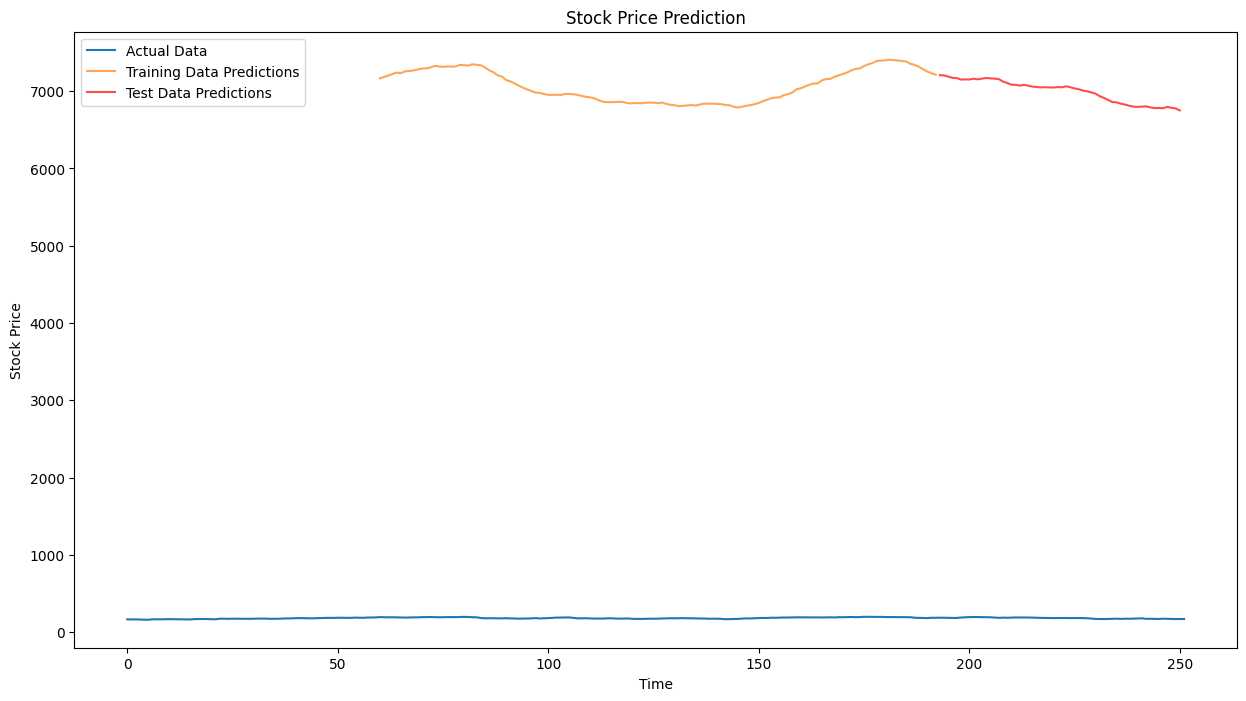

In [23]:
# Check the lengths first
print("Length of scaled_data:", len(scaled_data))
print("Length of train_predict:", len(train_predict))
print("Length of test_predict:", len(test_predict))

# Ensure the indices are correct
train_len = len(train_predict) + look_back  # end of training part
test_start = train_len  # start of test part
test_end = test_start + len(test_predict)  # end of test part

# Create empty arrays for plotting that match the length of the original dataset
train_predict_plot = np.empty((total_len, 1))
train_predict_plot[:, :] = np.nan
test_predict_plot = np.empty((total_len, 1))
test_predict_plot[:, :] = np.nan

# Assign the predictions to the correct place in the plotting arrays
train_predict_plot[look_back:train_len, :] = train_predict
test_predict_plot[test_start:test_end, :] = test_predict

# Plot the actual data and the predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(train_predict_plot, label='Training Data Predictions', alpha=0.7)
plt.plot(test_predict_plot, label='Test Data Predictions', alpha=0.7, color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [24]:
def create_lagged_dataset(data, n_lags=1):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Number of lags (for example 3 days)
n_lags = 3
X, y = create_lagged_dataset(scaled_data, n_lags)

# Now reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


Epoch 1/100


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.3412 - val_loss: 0.3415
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3086 - val_loss: 0.2925
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2422 - val_loss: 0.2384
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2023 - val_loss: 0.1761
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1436 - val_loss: 0.1094
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - val_loss: 0.0512
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - val_loss: 0.0186
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_loss: 0.0185
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - val_loss: 0.0190
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0152
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0152
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - val_loss: 0.0148
Epoch 13/100

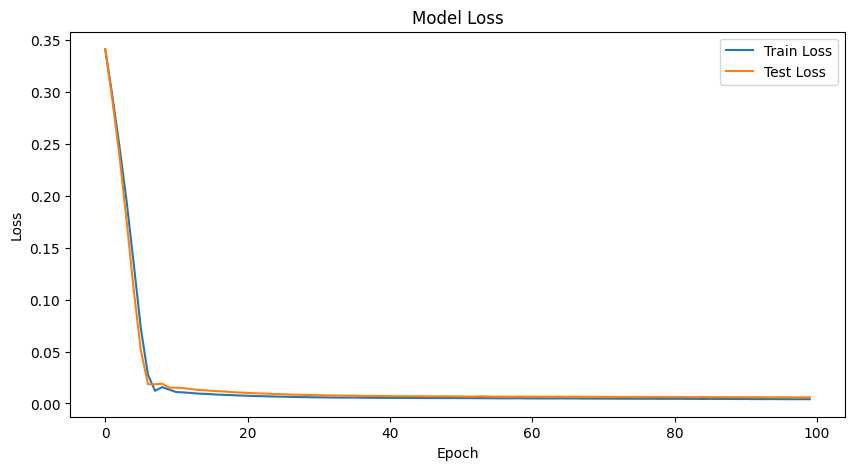

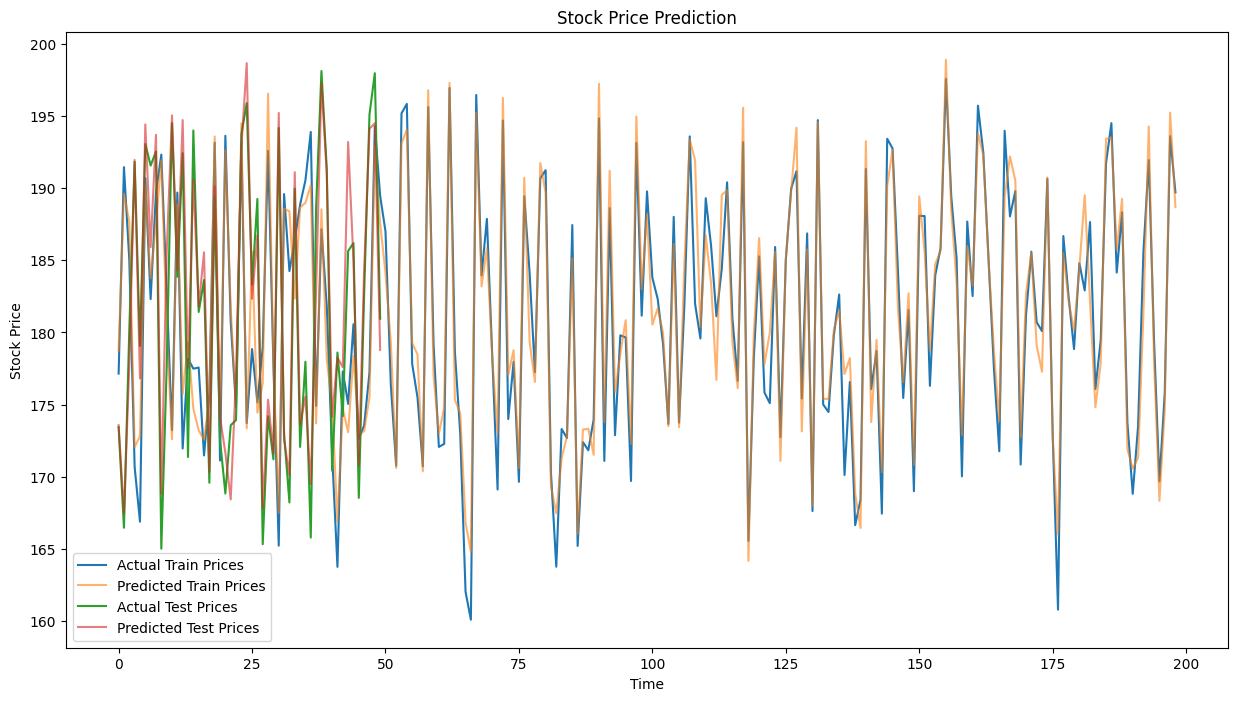

In [25]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create the lagged dataset
X, y = create_lagged_dataset(scaled_data, n_lags)

# Reshape X for the LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot training & validation loss values to monitor training performance
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the actual vs predicted stock prices
plt.figure(figsize=(15, 8))
plt.plot(train_actual, label='Actual Train Prices')
plt.plot(train_predict, label='Predicted Train Prices', alpha=0.6)
plt.plot(test_actual, label='Actual Test Prices')
plt.plot(test_predict, label='Predicted Test Prices', alpha=0.6)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("AAPL.csv")

# Selecting features (independent variables) and target (dependent variable)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.5423676198726414
Coefficients: [-6.14830414e-01  7.64747955e-01  8.46713641e-01 -4.91373764e-09]
Intercept: 1.0306740297851888


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("AAPL.csv")

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(df[['Open', 'High', 'Low', 'Volume']])

# Selecting features (independent variables) and target (dependent variable)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.5423676197260668
Coefficients: [-5.68612515  6.97953806  7.78036594 -0.08440447]
Intercept: 180.8925761600101


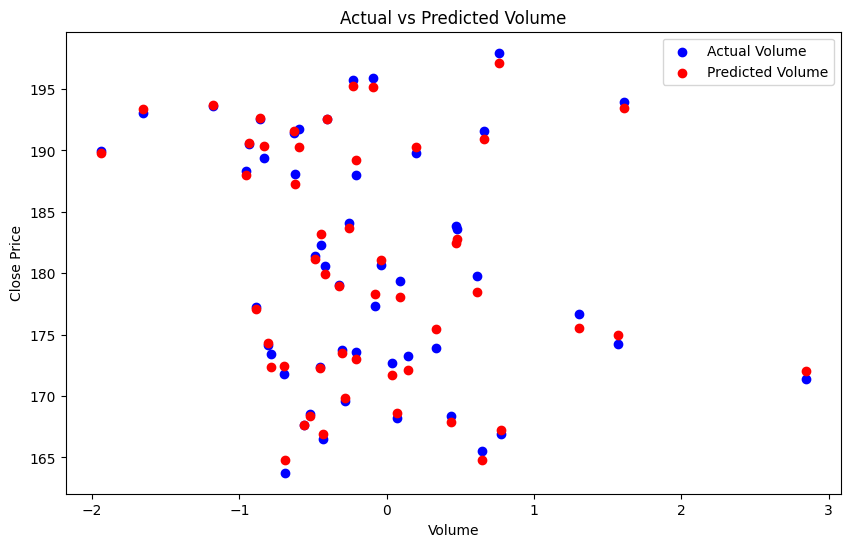

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("AAPL.csv")

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(df[['Open', 'High', 'Low', 'Volume']])

# Selecting features (independent variables) and target (dependent variable)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting actual vs predicted volume
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 3], y_test, color='blue', label='Actual Volume')
plt.scatter(X_test[:, 3], y_pred, color='red', label='Predicted Volume')
plt.title('Actual vs Predicted Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend()
plt.show()


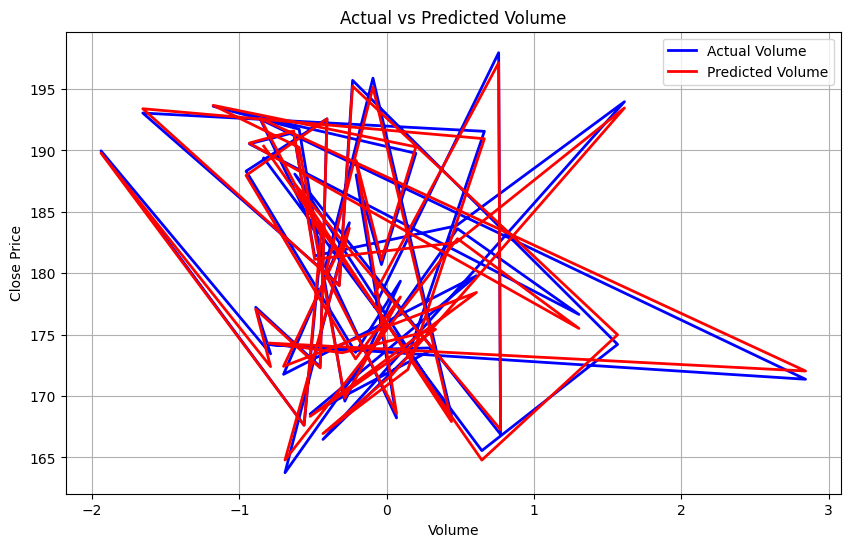

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("AAPL.csv")

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(df[['Open', 'High', 'Low', 'Volume']])

# Selecting features (independent variables) and target (dependent variable)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting actual vs predicted volume as line graphs
plt.figure(figsize=(10, 6))
plt.plot(X_test[:, 3], y_test, color='blue', label='Actual Volume', linewidth=2)
plt.plot(X_test[:, 3], y_pred, color='red', label='Predicted Volume', linewidth=2)
plt.title('Actual vs Predicted Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


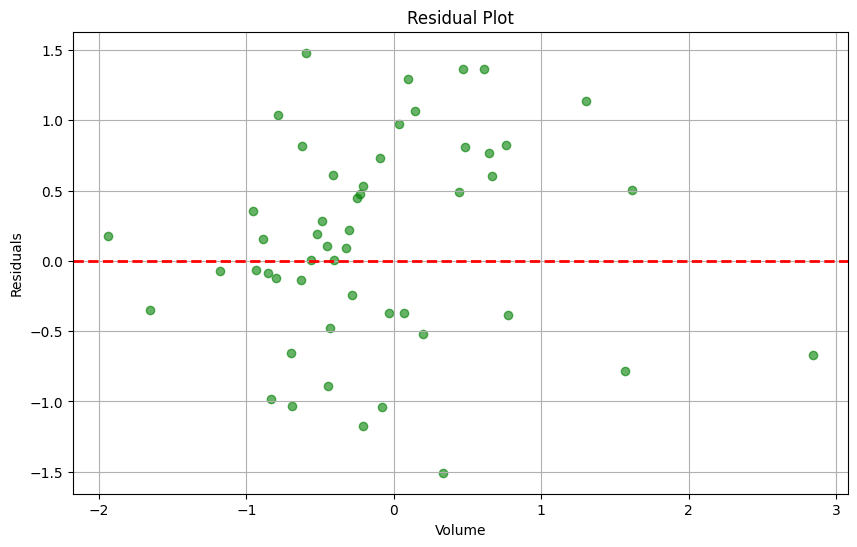

In [30]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residual plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 3], residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Volume')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


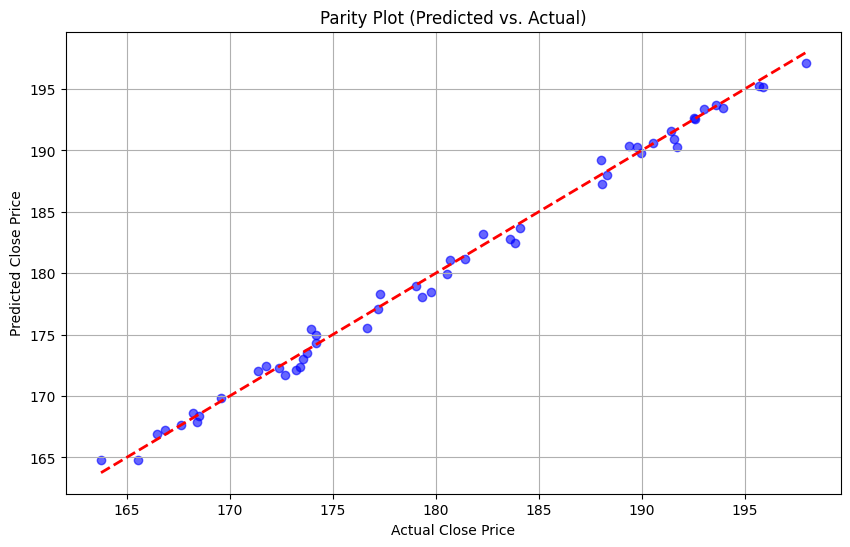

In [31]:
# Plotting parity plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Parity Plot (Predicted vs. Actual)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.show()


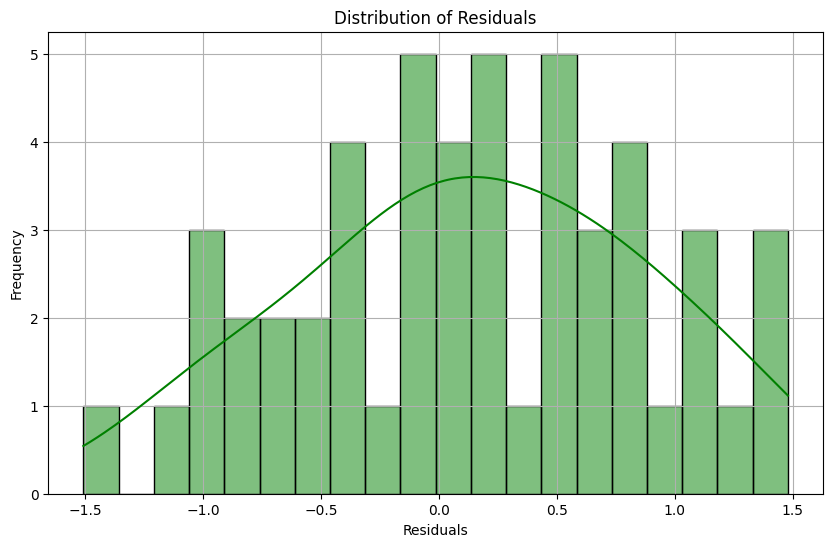

In [32]:
import seaborn as sns

# Plotting distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
